## 1. Problem Statement
Predict student's performance (test scores) using Gender, Ethnicity, Parental education, Lunch and Test prep course

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# import dataset
df = pd.read_csv('/Users/deepak/Desktop/student-performance/notebooks/data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
# check for missing values 
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Data Checks to perform 
* check missing values
* check duplicates
* check data type
* check the number of unique values of each column
* check statistics of data set
* check various categories peresent in the different categorical column

In [ ]:
# check null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
# check duplicates
df.duplicated().sum()

np.int64(0)

In [14]:
# check number of unique values for each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [15]:
# check dataset stats
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights
 * from above, means are close to each other: 66-68
 * all standard deviations are also close: 14.6-15.19
 * min score 0 for math, min higher for reading score and writing score

In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
# exploring data -- print unique categories from each column
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ", end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [25]:
# separate numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

print("Numeric Features: ", numeric_features)
print("Categorial Features: ", categorical_features)

Numeric Features:  ['math score', 'reading score', 'writing score']
Categorial Features:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [26]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# combine test scores into total and average
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3


In [29]:
print(df['total_score'], df['average_score'])
df.head()

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total_score, Length: 1000, dtype: int64 0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: average_score, Length: 1000, dtype: float64


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [36]:
# identify students with full marks
toppers_reading = len(df[df['reading score'] == 100])
toppers_writing = len(df[df['writing score'] == 100])
toppers_math = len(df[df['math score'] == 100])


print("Math Topper count:", toppers_math)
print("Reading Topper count:", toppers_reading)
print("Writing Topper count:", toppers_writing)

print("Total Toppers: ", toppers_reading + toppers_math + toppers_writing)

Math Topper count: 7
Reading Topper count: 17
Writing Topper count: 14
Total Toppers:  38


## Insights
 * Reading performance is high, so reading is easier
 * Math only has 7 toppers, so these kids are smarter and also math might be the difficult subject

In [38]:
# identify dummmers with low marks (<= 20)
# identify students with full marks
dummers_reading = len(df[df['reading score'] <= 20])
dummers_writing = len(df[df['writing score'] <= 20])
dummers_math = len(df[df['math score'] <= 20])


print("Math Dummer count:", dummers_math)
print("Reading Dummer count:", dummers_reading)
print("Writing Dummer count:", dummers_writing)

print("Total Dummers: ", dummers_reading + dummers_math + dummers_writing)

Math Dummer count: 4
Reading Dummer count: 1
Writing Dummer count: 3
Total Dummers:  8


## Insights
 * there's only one student who weak in reading 
 * there are 4 dummers in math

# Visualizations
 * Kernel Distribution Function (KDE)
 * Histograms

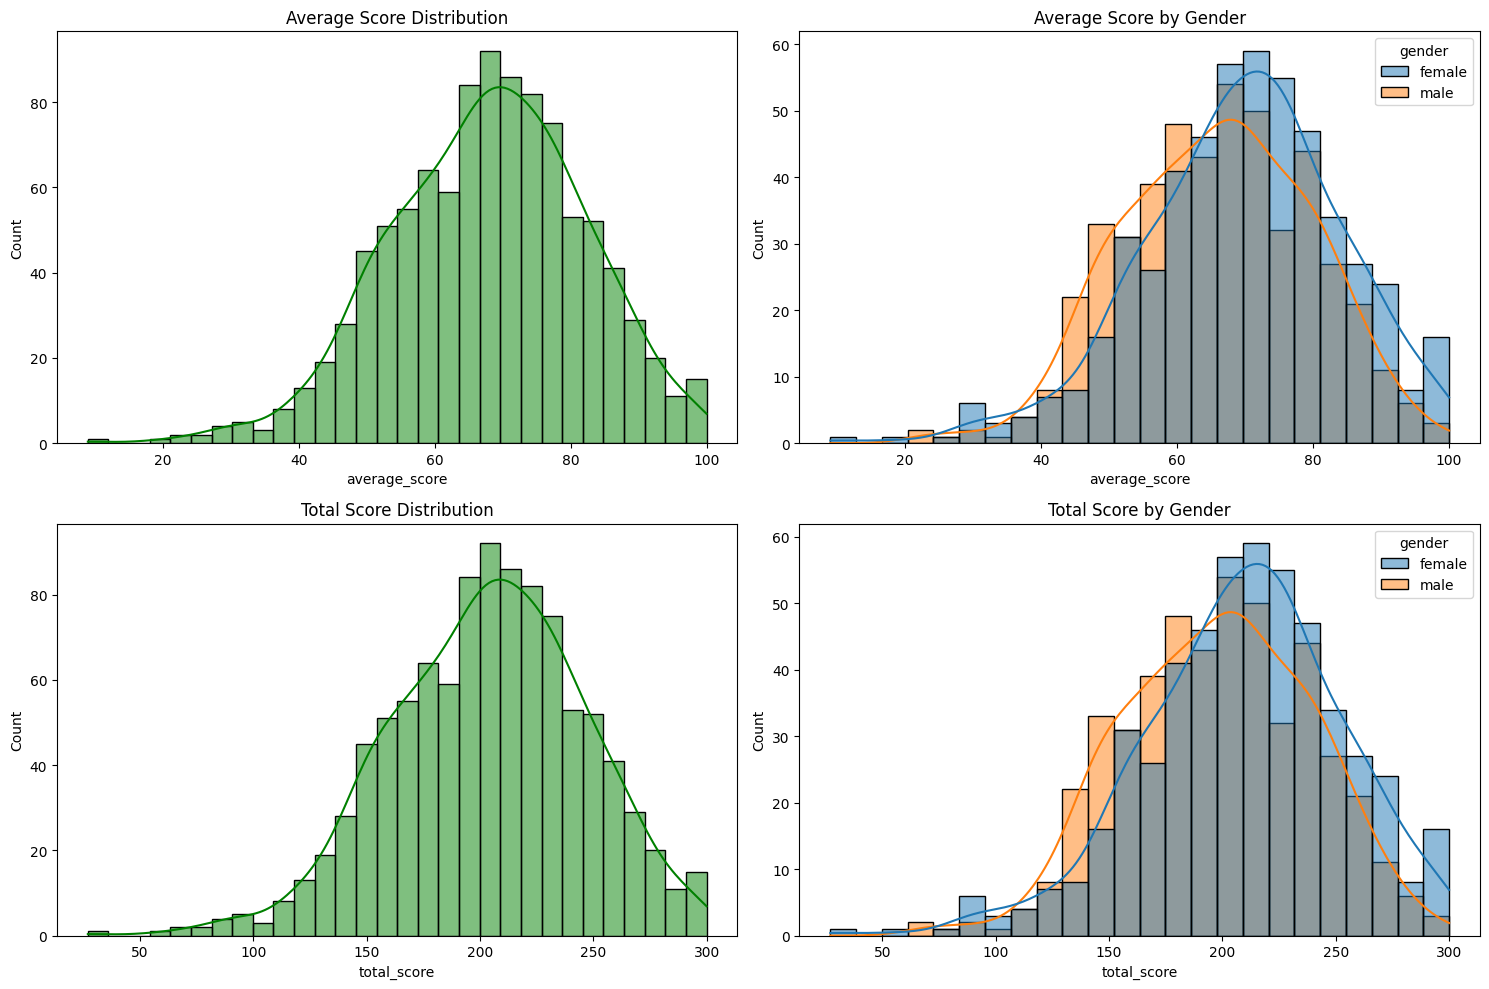

In [ ]:
plt.figure(figsize=(15, 10))

# hist wrt to average score
plt.subplot(2,2,1)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g')
plt.title("Average Score Distribution")

plt.subplot(2,2,2)
sns.histplot(data=df, x='average_score', kde=True, hue='gender')
plt.title("Average Score by Gender")

# hist wrt to total
plt.subplot(2,2,3)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.title("Total Score Distribution")

plt.subplot(2,2,4)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.title("Total Score by Gender")

plt.tight_layout()
plt.show()

## Insights
 * Females tend to perform better than males

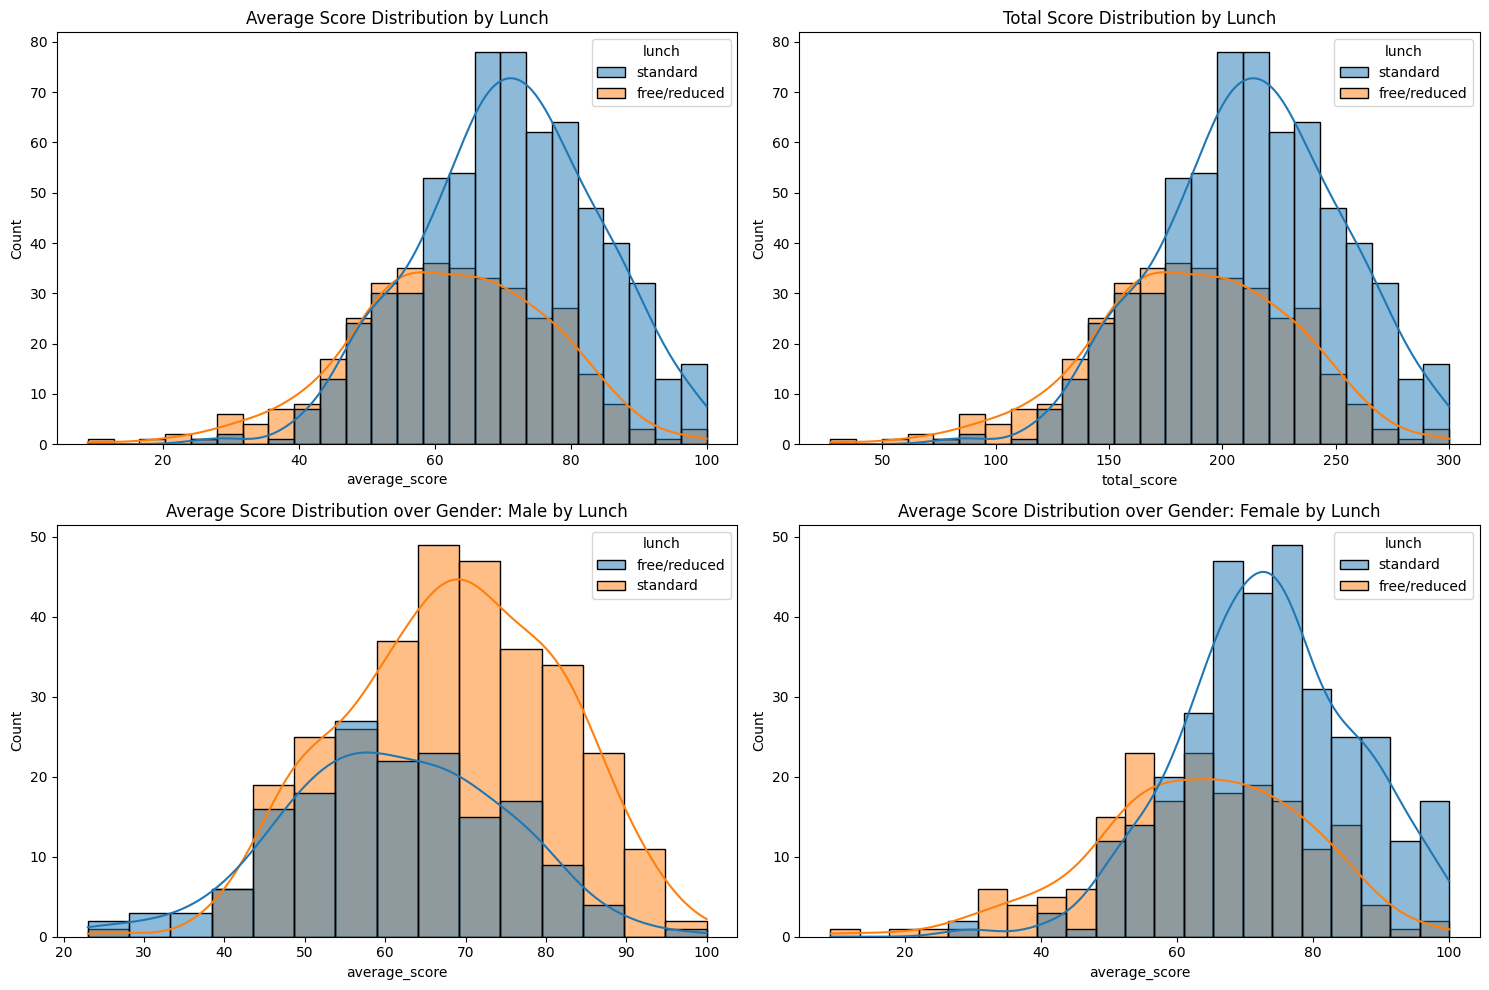

In [62]:
# performace hist wrt to lunch

plt.figure(figsize=(15,10))

# hist wrt lunch over average
plt.subplot(2,2,1)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch')
plt.title("Average Score Distribution by Lunch")

# hist wrt lunch over average
plt.subplot(2,2,2)
sns.histplot(data=df, x='total_score', kde=True, hue='lunch')
plt.title("Total Score Distribution by Lunch")

# hist wrt lunch over average and gender
plt.subplot(2,2,3)
sns.histplot(data=df[df.gender=='male'], x="average_score", kde=True, hue='lunch')
plt.title("Average Score Distribution over Gender: Male by Lunch")


plt.subplot(2,2,4)
sns.histplot(data=df[df.gender=='female'], x="average_score", kde=True, hue='lunch')
plt.title("Average Score Distribution over Gender: Female by Lunch")


plt.tight_layout()
plt.show()

## Insights
 * Students tend to perform well over standard lunch, irrespective of gender

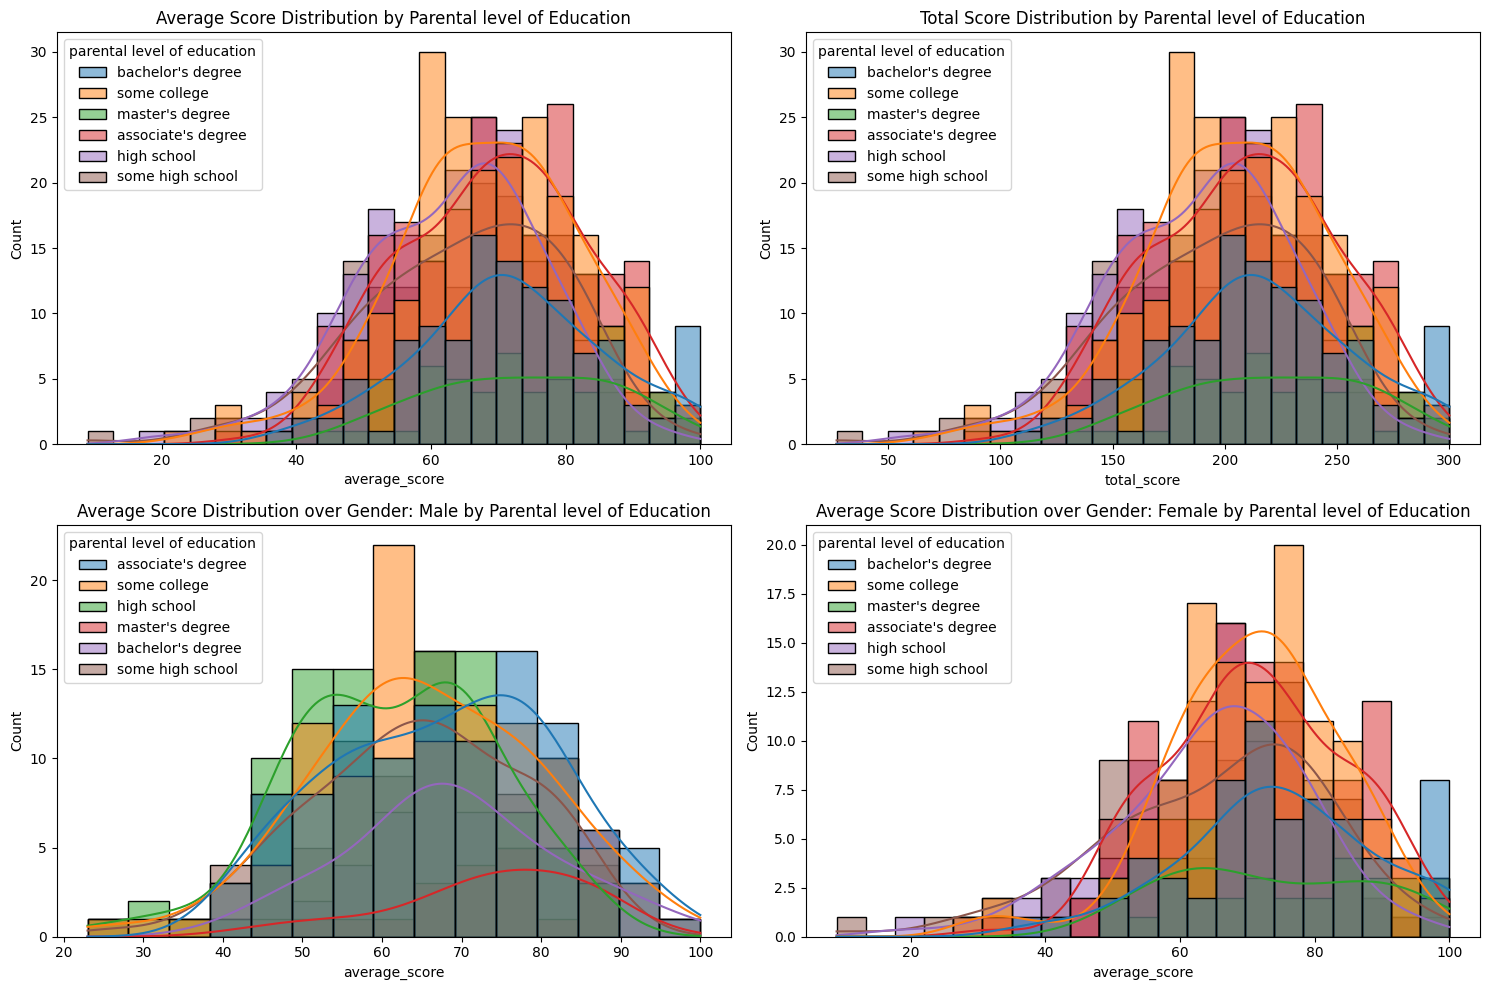

In [70]:
# performance hist wrt to parental level of education

plt.figure(figsize=(15,10))

# hist wrt to average
plt.subplot(2,2,1)
sns.histplot(data=df, x='average_score', kde=True, hue='parental level of education')
plt.title("Average Score Distribution by Parental level of Education")

# hist wrt to total
plt.subplot(2,2,2)
sns.histplot(data=df, x='total_score', kde= True, hue='parental level of education')
plt.title("Total Score Distribution by Parental level of Education")


# hist wrt to gender: male
plt.subplot(2,2,3)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue="parental level of education")
plt.title("Average Score Distribution over Gender: Male by Parental level of Education")


# hist wrt to gender: female
plt.subplot(2,2,4)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue="parental level of education")
plt.title("Average Score Distribution over Gender: Female by Parental level of Education")

plt.tight_layout()
plt.show()

## Insight
 * Parental Level of Education doesn't seem to affect performance of students
 * Although, some kids whose parents have a master's tend perform slightly better

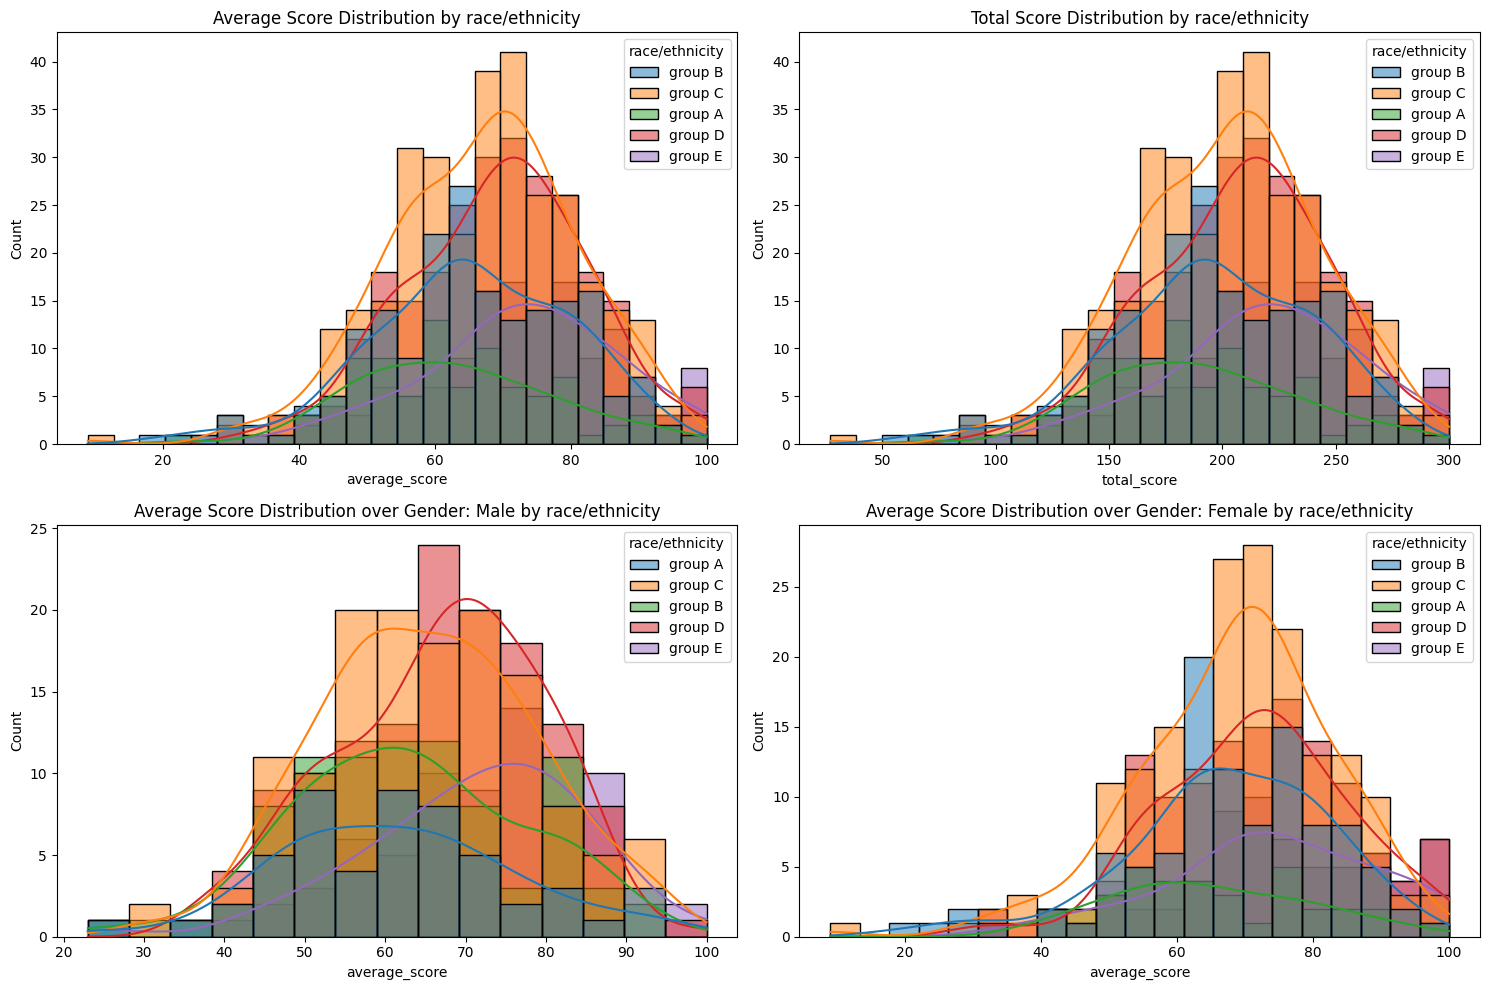

In [71]:
# performance hist wrt to race/ethnicity

plt.figure(figsize=(15,10))

# hist wrt to average
plt.subplot(2,2,1)
sns.histplot(data=df, x='average_score', kde=True, hue='race/ethnicity')
plt.title("Average Score Distribution by race/ethnicity")

# hist wrt to total
plt.subplot(2,2,2)
sns.histplot(data=df, x='total_score', kde= True, hue='race/ethnicity')
plt.title("Total Score Distribution by race/ethnicity")


# hist wrt to gender: male
plt.subplot(2,2,3)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue="race/ethnicity")
plt.title("Average Score Distribution over Gender: Male by race/ethnicity")


# hist wrt to gender: female
plt.subplot(2,2,4)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue="race/ethnicity")
plt.title("Average Score Distribution over Gender: Female by race/ethnicity")

plt.tight_layout()
plt.show()

In [72]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## Insights
 * students of Group A and Group B tend to perform sightly poor, irrespective of gender


<Axes: title={'center': 'Writing Scores'}, ylabel='writing score'>

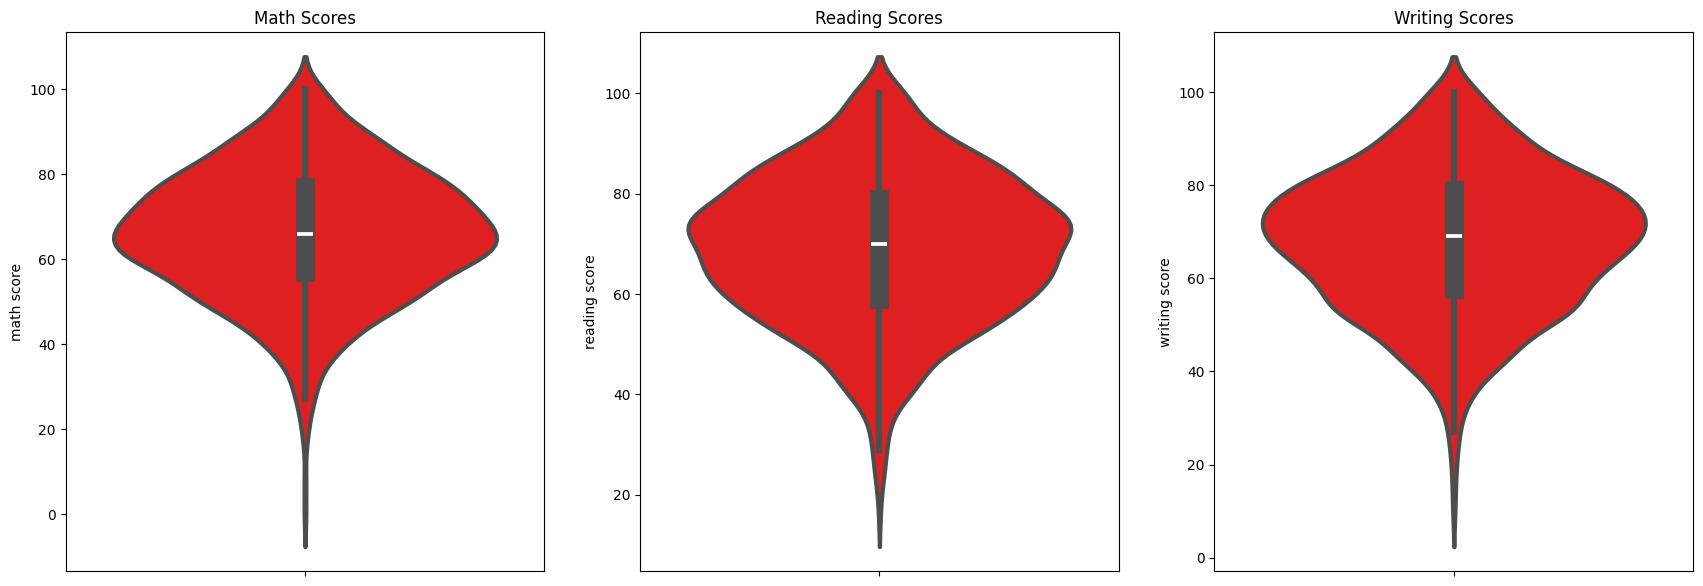

In [ ]:
# Max scores of students in all three subjects
plt.figure(figsize=(21,7))

plt.subplot(1, 3, 1)
plt.title("Math Scores")
sns.violinplot(data=df, y='math score', color='red', linewidth=3)

plt.subplot(1, 3, 2)
plt.title("Reading Scores")
sns.violinplot(data=df, y='reading score', color='red', linewidth=3)

plt.subplot(1, 3, 3)
plt.title("Writing Scores")
sns.violinplot(data=df, y='writing score', color='red', linewidth=3)